# 얼굴찾기 미니프로젝트 결과 비교 (소스 분석  & 결과 비교)

###(1) 교재 6장 - SVM을 이용한 얼굴찾기 소스 분석

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

from skimage.io import imread                   # 이미지를 읽어 들임
from skimage.transform import resize            # 이미지의 크기를 변경할 수 있음
from skimage.feature import hog                 # Histogram of Gradient 계산

<Figure size 640x480 with 0 Axes>

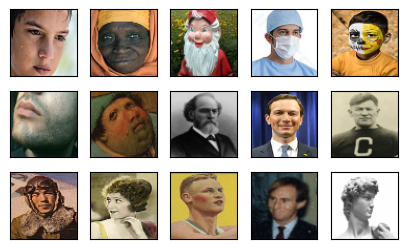

In [ ]:
url = 'https://github.com/dknife/ML/raw/main/data/Proj2/faces/'

face_images = []                                                    # image data를 저장할 배열

for i in range(15):
    file = url + 'img{0:02d}.jpg'.format(i+1)                       # 이미지 파일 이름을 만든다 (:02d는 두 자리수 이하일때 빈 자리수에 0을 채워주는 포맷팅 방법)
    img = imread(file)                                              # 이미지를 읽는다
    img = resize(img, (64,64))                                      # 이미지의 크기를 변경한다 (읽어온 이미지의 크기가 제각각이기때문에 64x64 크기를 가지는 이미지로 통일)
    face_images.append(img)                                         # face_images에 img를 append

# 이미지 배열을 subplot을 통해서 그려주는 함수
def plot_images(nRow, nCol, img):
    fig = plt.figure()
    fig, ax = plt.subplots(nRow, nCol, figsize = (nCol,nRow))       # subplot 정의
    for i in range(nRow):
        for j in range(nCol):
            if nRow <= 1: axis = ax[j]                              # 단일행인 경우 2차원 배열로 만들어줄 필요가 없기 때문에 예외처리
            else:         axis = ax[i, j]
            axis.get_xaxis().set_visible(False)                     # x축에 대한 정보 출력 비활성화
            axis.get_yaxis().set_visible(False)                     # y축에 대한 정보 출력 비활성화
            axis.imshow(img[i*nCol+j])                              # 해당 subplot에 출력

plot_images(3,5, face_images)                                       # 3행 5열로 images를 출력

<ipython-input-3-53423f420186>:10: FutureWarning: `multichannel` is a deprecated argument name for `hog`. It will be removed in version 1.0. Please use `channel_axis` instead.
  hog_desc, hog_image = hog(face_images[i], orientations=8, pixels_per_cell=(16, 16),


(128,)


<Figure size 640x480 with 0 Axes>

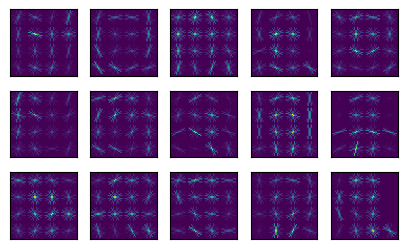

<Figure size 640x480 with 0 Axes>

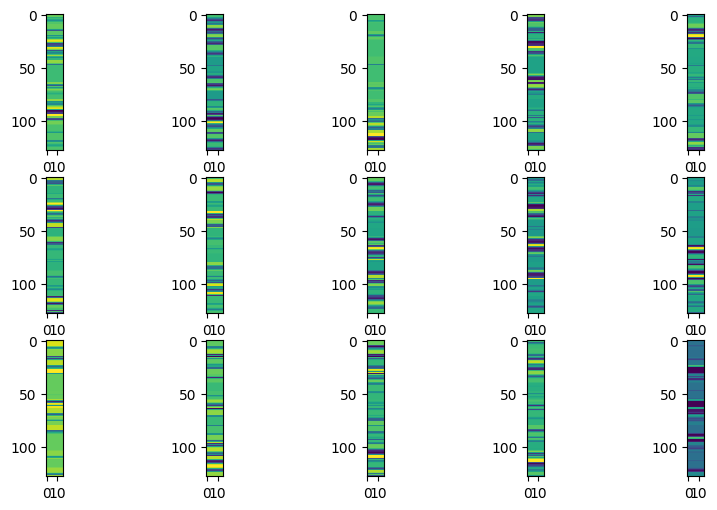

In [ ]:
# 이미지를 입력 그대로 입력 데이터로 사용하는 것은 바람직하지 않음 (이미지가 가진 여러 가지 중요하지 않은 특징이 학습을 방해할 수 있기 때문)
# -> 이미지의 기울기 히스토그램 (histogram of gradient)을 사용하여 이미지의 중요한 특징만을 추출

face_hogs = []          # histogram of gradient 이미지를 담을 배열
face_features = []      # histogram of gradient descriptor를 담을 배열

for i in range(15):
    # face image를 순차적으로 입력 이미지로 주면 해당 image를 16x16 크기의 cell로 나누고 1x1 크기의 block으로 나눈다.
    # 각 block을 8개의 방향으로 구분하여 각 방향별 빈도를 계산하여 histogram of gradient를 계산하고 그 결과 descriptor를 hog_desc에, 이미지를 hog_image에 결과로 도출
    hog_desc, hog_image = hog(face_images[i], orientations=8, pixels_per_cell=(16, 16),
                              cells_per_block=(1, 1), visualize=True, multichannel=True)    # orientations : histogram의 방향성 개수,
                                                                                            # pixels_per_cell : cell size
                                                                                            # cells_per_block : block size
                                                                                            # visualize : True로 설정시 histogram을 가시화한 이미지가 생성됨
                                                                                            # multichannel : True로 설정시 입력 이미지가 다채널 이미지임을 설정함
    face_hogs.append(hog_image)             # face_hogs에 hog_image를 append
    face_features.append(hog_desc)          # face_features hog_desc를 append

plot_images(3, 5, face_hogs)                # 3행 5열로 images를 출력
                                            # histogram 이미지를 그대로 이미지의 특징 벡터로 사용하기는 어렵다.

print(face_features[0].shape)               # 16개의 block 각각이 8 방향에 대한 정보를 담고 있으니 (128,) 크기를 가진다.

fig = plt.figure()
fig, ax = plt.subplots(3,5, figsize = (10,6))

for i in range(3):
    for j in range(5):
        ax[i, j].imshow(resize(face_features[i*5+j], (128,16)))       # 이미지의 특징 벡터로 사용하기 위해서 처음에 나눠준 cell size, block size를 resize를 통해 원래대로 돌려준다.

<Figure size 640x480 with 0 Axes>

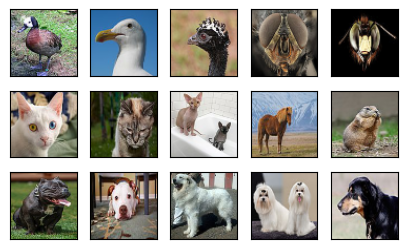

In [ ]:
# dataset만 변경하여 이전 과정과 동일하게 수행

url = 'https://github.com/dknife/ML/raw/main/data/Proj2/animals/'

animal_images = []

for i in range(15):
    file = url + 'img{0:02d}.jpg'.format(i+1)
    img = imread(file)
    img = resize(img, (64,64))
    animal_images.append(img)

plot_images(3, 5, animal_images)

<ipython-input-5-d034bda7cef2>:7: FutureWarning: `multichannel` is a deprecated argument name for `hog`. It will be removed in version 1.0. Please use `channel_axis` instead.
  hog_desc, hog_image = hog(animal_images[i], orientations=8, pixels_per_cell=(16, 16), cells_per_block=(1, 1), visualize=True, multichannel=True)


<Figure size 640x480 with 0 Axes>

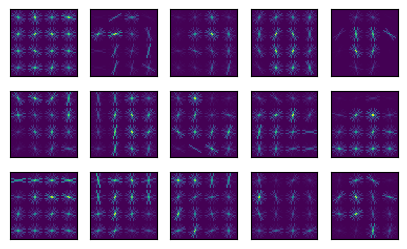

<Figure size 640x480 with 0 Axes>

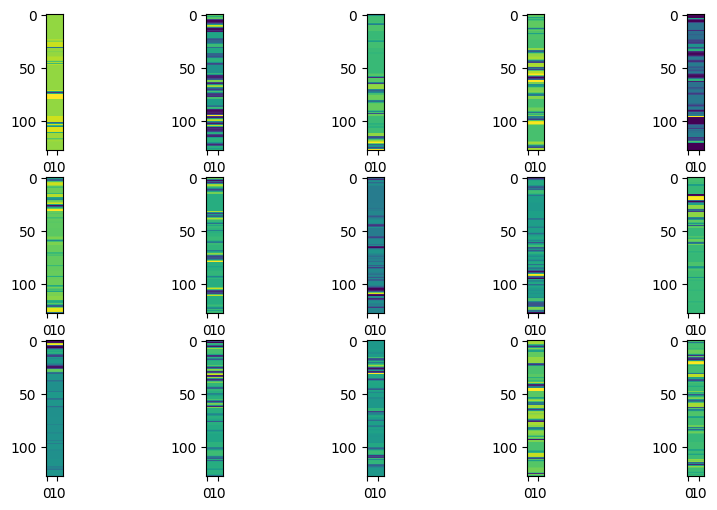

In [ ]:
# dataset만 변경하여 이전 과정과 동일하게 수행

animal_hogs = []
animal_features = []

for i in range(15):
    hog_desc, hog_image = hog(animal_images[i], orientations=8, pixels_per_cell=(16, 16), cells_per_block=(1, 1), visualize=True, multichannel=True)
    animal_hogs.append(hog_image)
    animal_features.append(hog_desc)

plot_images(3, 5, animal_hogs)

fig = plt.figure()
fig, ax = plt.subplots(3,5, figsize = (10,6))
for i in range(3):
 for j in range(5):
   ax[i, j].imshow(resize(animal_features[i*5+j], (128,16)))

<Figure size 640x480 with 0 Axes>

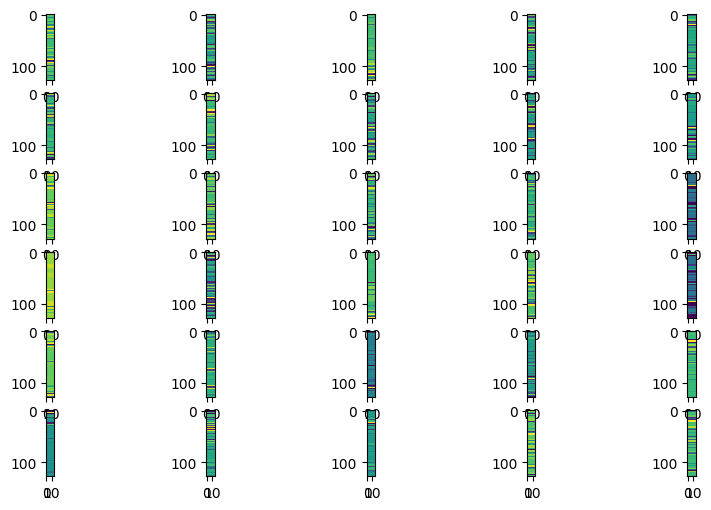

In [ ]:
X = []          # 얼굴 이미지의 특징 벡터와 동물 이미지의 특징 벡터를 저장할 배열
y = []          # 입력 이미지에 대해 얼굴은 1, 사람 얼굴이 아닌 입력에는 0으로 label하여 저장할 배열


for feature in face_features:
    X.append(feature)                 # X에 feature를 append
    y.append(1)                       # 입력 이미지가 얼굴임으로 y에 1를 append
for feature in animal_features:
    X.append(feature)                 # X에 feature를 append
    y.append(0)                       # 입력 이미지가 얼굴이 아님으로 y에 0을 append

fig = plt.figure()
fig, ax = plt.subplots(6,5, figsize = (10,6))                                 # 6행 5열로 images를 출력

for i in range(6):
 for j in range(5):
   ax[i, j].imshow(resize(X[i*5+j], (128,16)),interpolation='nearest')        # resize하다가 원소에 존재하지 않는 값이 있다면 최근방 이웃보간법 적용
                                                                              # (이외에도 https://matplotlib.org/stable/gallery/images_contours_and_fields/interpolation_methods.html 와 같은 보간법을 적용할 수 있음)

In [ ]:
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

polynomial_svm_clf = Pipeline([                                       # 파이프라인으로 미리 정의하여 순차적으로 SVM 객체를 구성하도록 함
    ("scaler", StandardScaler()),                                     # 데이터 표준화 단계 포함
    ("svm_clf", SVC(C=1, kernel = 'poly', degree=5, coef0=10.0))      # kernel trick을 사용하여 5차원 - PolynomialFeatures - hard margin - SVM 포함
                                                                      # C : Slack 변수, kernel : kernel trick을 사용할 kernel, degree : PolynomialFeatures를 구성할 차수, ceof0 : 모델이 높은 차수와 낮은 차수에 얼마나 영향을 받을지 조절
 ])

polynomial_svm_clf.fit(X, y)                                          # SVM fitting

Pipeline(steps=[('scaler', StandardScaler()),
                ('svm_clf', SVC(C=1, coef0=10.0, degree=5, kernel='poly'))])

In [ ]:
yhat = polynomial_svm_clf.predict(X)             # fitting된 model으로 예측

print(yhat)                                      # 기존의 레이블과 동일한 결과 도출 -> 학습 데이터에 대해서는 학습이 잘 이루어졌음

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


<Figure size 640x480 with 0 Axes>

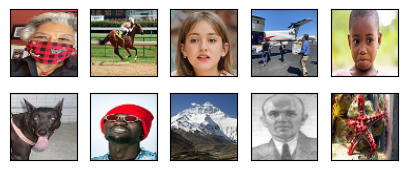

In [ ]:
# dataset만 변경하여 이전 과정과 동일하게 수행

url = 'https://github.com/dknife/ML/raw/main/data/Proj2/test_data/'

test_images = []                                    # test images를 저장할 배열

for i in range(10):
    file = url + 'img{0:02d}.jpg'.format(i+1)
    img = imread(file)
    img = resize(img, (64,64))
    test_images.append(img)

plot_images(2, 5, test_images)                      # 2행 5열로 images를 출력

<ipython-input-10-dc916a17816f>:7: FutureWarning: `multichannel` is a deprecated argument name for `hog`. It will be removed in version 1.0. Please use `channel_axis` instead.
  hog_desc, hog_image = hog(test_images[i], orientations=8, pixels_per_cell=(16, 16), cells_per_block=(1, 1), visualize=True, multichannel=True)


<Figure size 640x480 with 0 Axes>

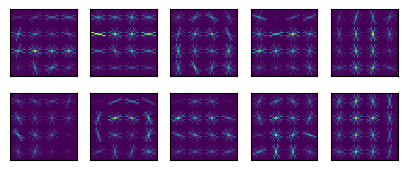

<Figure size 640x480 with 0 Axes>

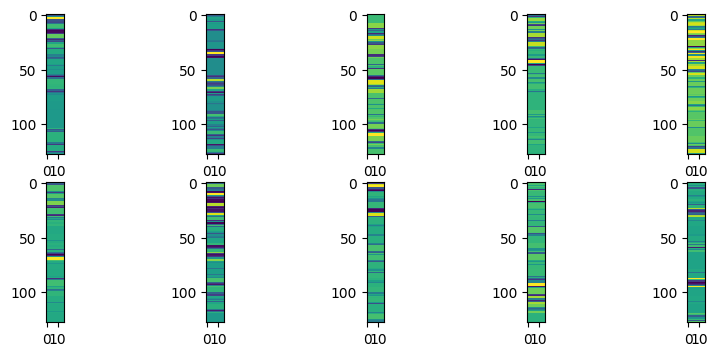

In [ ]:
# dataset만 변경하여 이전 과정과 동일하게 수행

test_hogs = []
test_features = []

for i in range(10):
    hog_desc, hog_image = hog(test_images[i], orientations=8, pixels_per_cell=(16, 16), cells_per_block=(1, 1), visualize=True, multichannel=True)
    test_hogs.append(hog_image)
    test_features.append(hog_desc)

plot_images(2, 5, test_hogs)

fig = plt.figure()
fig, ax = plt.subplots(2,5, figsize = (10,4))
for i in range(2):
 for j in range(5):
   ax[i, j].imshow(resize(test_features[i*5+j], (128,16)), interpolation='nearest')

In [ ]:
test_result = polynomial_svm_clf.predict(test_features)
print(test_result)                                            # 5개의 정답 중에서 3개를 검출해냈음

[1 0 1 0 0 0 0 0 1 0]


<Figure size 640x480 with 0 Axes>

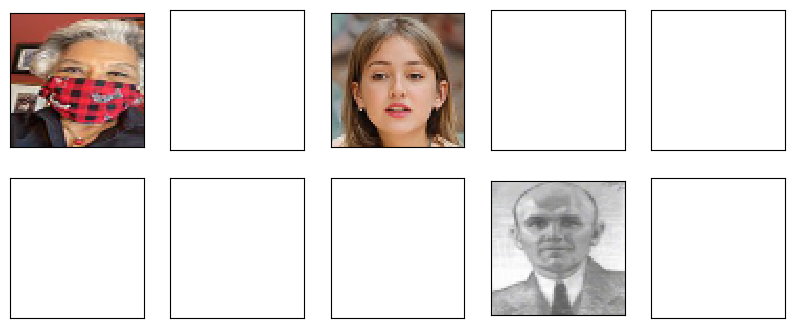

In [ ]:
fig = plt.figure()
fig, ax = plt.subplots(2,5, figsize = (10,4))
for i in range(2):
    for j in range(5):
        ax[i, j].get_xaxis().set_visible(False)                                # x축에 대한 정보 출력 비활성화
        ax[i, j].get_yaxis().set_visible(False)                                # y축에 대한 정보 출력 비활성화
        if test_result[i*5+j] == 1:
            ax[i, j].imshow(test_images[i*5+j],interpolation='nearest')        # 정답으로 검출해낸 이미지만 출력

##(2) 교재 9장 - CNN을 이용한 얼굴찾기 소스 분석

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

from skimage.io import imread             # 이미지를 읽어 들인다
from skimage.transform import resize      # 이미지의 크기를 변경할 수 있다

<Figure size 640x480 with 0 Axes>

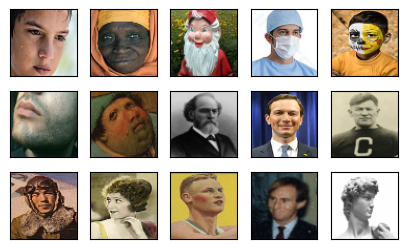

In [ ]:
url = 'https://github.com/dknife/ML/raw/main/data/Proj2/faces/'

face_images = []                                                    # image data를 저장할 배열

for i in range(15):
    file = url + 'img{0:02d}.jpg'.format(i+1)                       # 이미지 파일 이름을 만든다 (:02d는 두 자리수 이하일때 빈 자리수에 0을 채워주는 포맷팅 방법)
    img = imread(file)                                              # 이미지를 읽는다
    img = resize(img, (64,64))                                      # 이미지의 크기를 변경한다 (읽어온 이미지의 크기가 제각각이기때문에 64x64 크기를 가지는 이미지로 통일)
    face_images.append(img)                                         # face_images에 img를 append

# 이미지 배열을 subplot을 통해서 그려주는 함수
def plot_images(nRow, nCol, img):
    fig = plt.figure()
    fig, ax = plt.subplots(nRow, nCol, figsize = (nCol,nRow))       # subplot 정의
    for i in range(nRow):
        for j in range(nCol):
            if nRow <= 1: axis = ax[j]                              # 단일행인 경우 2차원 배열로 만들어줄 필요가 없기 때문에 예외처리
            else:         axis = ax[i, j]
            axis.get_xaxis().set_visible(False)                     # x축에 대한 정보 출력 비활성화
            axis.get_yaxis().set_visible(False)                     # y축에 대한 정보 출력 비활성화
            axis.imshow(img[i*nCol+j])                              # 해당 subplot에 출력

plot_images(3,5, face_images)                                       # 3행 5열로 images를 출력

<Figure size 640x480 with 0 Axes>

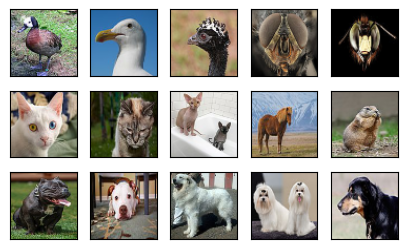

In [ ]:
# dataset만 변경하여 이전 과정과 동일하게 수행

url = 'https://github.com/dknife/ML/raw/main/data/Proj2/animals/'

animal_images = []

for i in range(15):
    file = url + 'img{0:02d}.jpg'.format(i+1)
    img = imread(file)
    img = resize(img, (64,64))
    animal_images.append(img)

plot_images(3, 5, animal_images)

In [ ]:
X = face_images + animal_images                                         # 불러온 face_images와 animal_images를 모아서 입력 데이터 구성
y = [[1,0]]* len(face_images) + [[0,1]] * len(animal_images)            # 구성한 입력 데이터에 맞게 face_images는 [1,0]으로, animal_images는 [0,1]로 레이블링

# 연산의 편의성을 위해 넘파이 배열로 캐스팅
X = np.array(X)
y = np.array(y)

print(X.shape, y.shape)

(30, 64, 64, 3) (30, 2)


In [ ]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

model = keras.models.Sequential( [
    # 합성곱과 풀링 계층
    keras.layers.Conv2D(input_shape = (64, 64, 3),                      # 64x64 크기의 컬러 이미지(3채널)을 입력으로 지정
                        kernel_size = (3,3), filters = 32),             # 3x3 크기의 필터 32종으로 컨볼루션 적용 -> 62x62 크기의 이미지 32장 출력 (padding 적용 X)
    keras.layers.MaxPooling2D((2, 2), strides=2),                       # 2x2 크기의 맥스 풀링을 strides를 2로 적용 -> 이미지의 가로, 세로가 절반으로 줄어듬 -> 31x31 크기의 이미지 32장 출력
    keras.layers.Conv2D(kernel_size = (3,3), filters = 32),             # 3x3 크기의 필터 32종으로 컨볼루션 적용 -> 29x29 크기의 이미지 32장 출력 (padding 적용 X)
    keras.layers.MaxPooling2D((2, 2), strides=2),                       # 2x2 크기의 맥스 풀링을 strides를 2로 적용 -> 이미지의 가로, 세로가 절반으로 줄어듬 -> 14x14 크기의 이미지 32장 출력
    keras.layers.Conv2D(kernel_size = (3,3), filters = 32),             # 3x3 크기의 필터 32종으로 컨볼루션 적용 -> 12x12 크기의 이미지 32장 출력 (padding 적용 X)
    keras.layers.MaxPooling2D((2, 2), strides=2),                       # 2x2 크기의 맥스 풀링을 strides를 2로 적용 -> 이미지의 가로, 세로가 절반으로 줄어듬 -> 6x6 크기의 이미지 32장 출력
    keras.layers.Conv2D(kernel_size = (3,3), filters = 32),             # 3x3 크기의 필터 32종으로 컨볼루션 적용 -> 4x4 크기의 이미지 32장 출력 (padding 적용 X)

    # 전통적 신경망 계층
    keras.layers.Flatten(),                                     # 4x4 크기의 이미지 32장을 512x1 크기의 1차원 배열로 팽창
    keras.layers.Dense(128, activation = 'relu'),               # 128개의 노드를 가지는 은닉층 생성 (활성화 함수는 relu 사용)
    keras.layers.Dense(16, activation = 'relu'),                # 16개의 노드를 가지는 은닉층 생성 (활성화 함수는 relu 사용)
    keras.layers.Dense(2, activation = 'softmax'),              # face_images와 animal_images를 구분해야하기 때문에 2개의 노드를 출력으로 지정 (활성화 함수는 softmax 사용)
])

In [ ]:
model.summary()                     # 형성된 모델의 구조 확인

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 62, 62, 32)        896       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 31, 31, 32)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 29, 29, 32)        9248      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 12, 12, 32)        9248      
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 6, 6, 32)        

In [ ]:
# 학습을 위해 손실 함수는 sparse_categorical_crossentropy, 최적화 함수는 adam 최적화, 모델 평가 지표는 accuracy 값을 가지도록 하여 컴파일
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(X, y, epochs = 100)                                                     # default batch size인 32로 100회 반복하여 학습

Epoch 1/100
1/1 [==============================] - 2s 2s/step - loss: 0.6979 - accuracy: 0.5000
Epoch 2/100
1/1 [==============================] - 0s 151ms/step - loss: 0.6686 - accuracy: 0.5667
Epoch 3/100
1/1 [==============================] - 0s 147ms/step - loss: 0.6630 - accuracy: 0.5000
Epoch 4/100
1/1 [==============================] - 0s 150ms/step - loss: 0.6127 - accuracy: 0.8667
Epoch 5/100
1/1 [==============================] - 0s 157ms/step - loss: 0.5890 - accuracy: 0.7000
Epoch 6/100
1/1 [==============================] - 0s 141ms/step - loss: 0.5407 - accuracy: 0.9000
Epoch 7/100
1/1 [==============================] - 0s 148ms/step - loss: 0.5092 - accuracy: 0.8333
Epoch 8/100
1/1 [==============================] - 0s 144ms/step - loss: 0.4566 - accuracy: 0.9667
Epoch 9/100
1/1 [==============================] - 0s 149ms/step - loss: 0.4086 - accuracy: 0.9667
Epoch 10/100
1/1 [==============================] - 0s 152ms/step - loss: 0.3753 - accuracy: 0.8667
Epoch 11/100

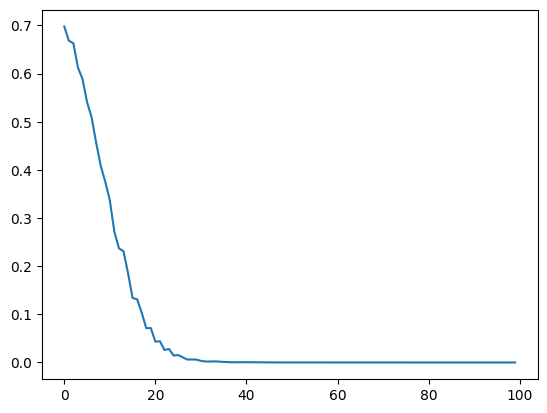

In [ ]:
plt.plot(history.history['loss'])                       # 손실 값의 변화를 보여주는 plot 출력

1/1 [==============================] - 0s 130ms/step


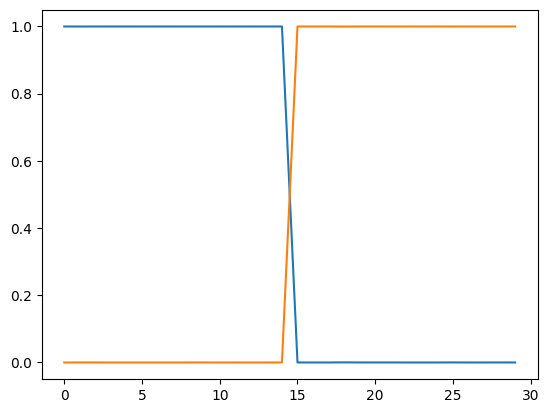

In [ ]:
yhat = model.predict(X)                      # fitting된 model으로 예측 (학습 데이터)

plt.plot(yhat)                               # 예측 결과를 보여주는 plot 출력

<Figure size 640x480 with 0 Axes>

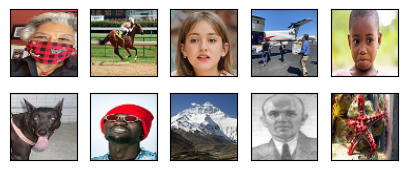

In [ ]:
# dataset만 변경하여 이전 과정과 동일하게 수행

url = 'https://github.com/dknife/ML/raw/main/data/Proj2/test_data/'

test_images = []                                    # test images를 저장할 배열

for i in range(10):
    file = url + 'img{0:02d}.jpg'.format(i+1)
    img = imread(file)
    img = resize(img, (64,64))
    test_images.append(img)

test_images = np.array(test_images)
plot_images(2, 5, test_images)                      # 2행 5열로 images를 출력

1/1 [==============================] - 0s 39ms/step


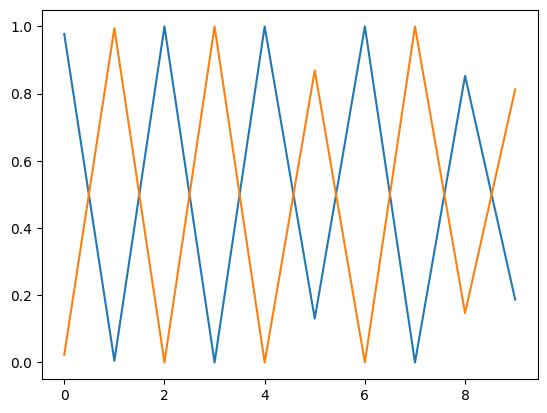

In [ ]:
test_result = model.predict(test_images)            # fitting된 model으로 예측 (테스트 데이터)

plt.plot(test_result)                               # 예측 결과를 보여주는 plot 출력

<Figure size 640x480 with 0 Axes>

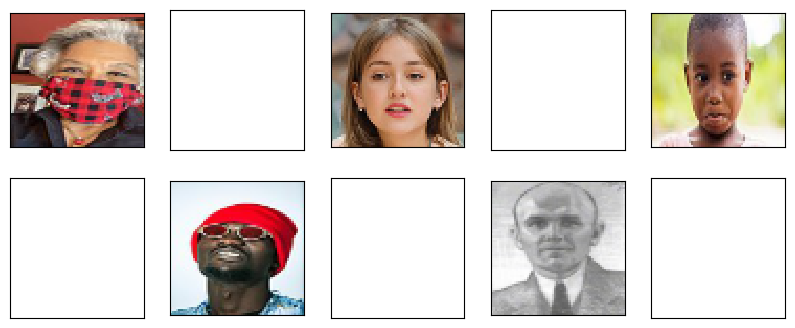

In [ ]:
fig = plt.figure()
fig, ax = plt.subplots(2,5, figsize = (10,4))
for i in range(2):
    for j in range(5):
        ax[i, j].get_xaxis().set_visible(False)                                     # x축에 대한 정보 출력 비활성화
        ax[i, j].get_yaxis().set_visible(False)                                     # y축에 대한 정보 출력 비활성화
        if test_result[i*5+j][0] > 0.5:
            ax[i, j].imshow(test_images[i*5+j],interpolation='nearest')             # 정답으로 검출해낸 이미지만 출력

##(3) 교재 9장 - 전이학습을 이용한 얼굴찾기 소스 분석

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

from skimage.io import imread             # 이미지를 읽어 들인다
from skimage.transform import resize      # 이미지의 크기를 변경할 수 있다

In [ ]:
from keras.applications.inception_v3 import preprocess_input
from keras.applications.inception_v3 import InceptionV3
from keras import models, layers
from keras.models import Model

<Figure size 640x480 with 0 Axes>

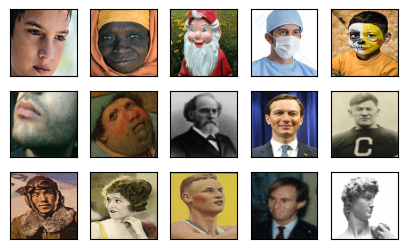

In [ ]:
url = 'https://github.com/dknife/ML/raw/main/data/Proj2/faces/'

face_images = []                                                            # image data를 저장할 배열

for i in range(15):
    file = url + 'img{0:02d}.jpg'.format(i+1)                               # 이미지 파일 이름을 만든다 (:02d는 두 자리수 이하일때 빈 자리수에 0을 채워주는 포맷팅 방법)
    img = imread(file)                                                      # 이미지를 읽는다
    img = resize(img, (75,75))                                              # 이미지의 크기를 변경한다 (읽어온 이미지의 크기가 제각각이기때문에 75x75 크기를 가지는 이미지로 통일)
    face_images.append(img)                                                 # face_images에 img를 append

# 이미지 배열을 subplot을 통해서 그려주는 함수
def plot_images(nRow, nCol, img):
    fig = plt.figure()
    fig, ax = plt.subplots(nRow, nCol, figsize = (nCol,nRow))           # subplot 정의
    for i in range(nRow):
        for j in range(nCol):
            if nRow <= 1: axis = ax[j]                                  # 단일행인 경우 2차원 배열로 만들어줄 필요가 없기 때문에 예외처리
            else:         axis = ax[i, j]
            axis.get_xaxis().set_visible(False)                         # x축에 대한 정보 출력 비활성화
            axis.get_yaxis().set_visible(False)                         # y축에 대한 정보 출력 비활성화
            axis.imshow(img[i*nCol+j])                                  # 해당 subplot에 출력

plot_images(3,5, face_images)                                           # 3행 5열로 images를 출력

<Figure size 640x480 with 0 Axes>

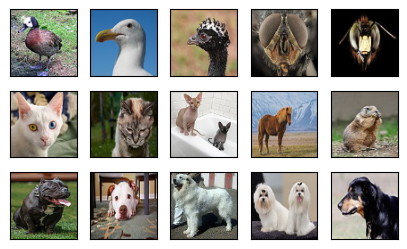

In [ ]:
# dataset만 변경하여 이전 과정과 동일하게 수행

url = 'https://github.com/dknife/ML/raw/main/data/Proj2/animals/'

animal_images = []
for i in range(15):
    file = url + 'img{0:02d}.jpg'.format(i+1)
    img = imread(file)
    img = resize(img, (75,75))
    animal_images.append(img)

plot_images(3,5, animal_images)

In [ ]:
X = face_images + animal_images                                             # 불러온 face_images와 animal_images를 모아서 입력 데이터 구성
y = [[1]]* len(face_images) + [[0]] * len(animal_images)                    # 구성한 입력 데이터에 맞게 face_images는 1으로, animal_images는 0으로 레이블링

# 연산의 편의성을 위해 넘파이 배열로 캐스팅
X = np.array(X)
y = np.array(y)

print(X.shape, y.shape)

(30, 75, 75, 3) (30, 1)


In [ ]:
# 전이 학습을 통해 수행할 것이기 때문에 사전 훈련된 모델(InceptionV3)을 가져옴
pre_trained_model = InceptionV3(input_shape=(75, 75, 3),                        # 75x75 크기의 컬러 이미지(3채널)을 입력으로 지정
                                include_top=False,                              # InceptionV3 모델의 최상위에 있는 분류기 레이어를 포함하지 않고 모델을 구성
                                                                                # 즉, 마지막에 위치한 Fully Connected 레이어를 포함하지 않음으로서 모델을 특성 추출기로 사용할 수 있음
                                weights=None)                                   # 미리 훈련된 가중치는 사용하지 않도록 설정

In [ ]:
pre_trained_model.summary()                 # 형성된 모델의 구조 확인

Model: "inception_v3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_12 (InputLayer)          [(None, 75, 75, 3)]  0           []                               
                                                                                                  
 conv2d_854 (Conv2D)            (None, 37, 37, 32)   864         ['input_12[0][0]']               
                                                                                                  
 batch_normalization_846 (Batch  (None, 37, 37, 32)  96          ['conv2d_854[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 activation_846 (Activation)    (None, 37, 37, 32)   0           ['batch_normalization_

In [ ]:
# 가져온 사전 훈련 모델의 신경망 일부를 원하는 출력이 되도록 변경

last_layer = pre_trained_model.get_layer('mixed7')                      # 가져온 사전 훈련 모델에서 mixed7 계층까지 적용된 모델 추출

last_output = last_layer.output
my_layer = layers.Flatten()(last_output)                                # 추출한 모델의 output을 입력으로 사용하기 위해서 1차원 배열로 팽창
my_layer = layers.Dense(256, activation='relu')(my_layer)               # 256개의 노드를 가지는 은닉층 추가 생성 (활성화 함수는 relu 사용)
my_layer = layers.Dense(256, activation='relu')(my_layer)               # 256개의 노드를 가지는 은닉층 추가 생성 (활성화 함수는 relu 사용)
my_layer = layers.Dense(1, activation='sigmoid')(my_layer)              # face_images와 animal_images를 이진 분류할 것이기에 1개의 노드를 출력으로 지정 (활성화 함수는 sigmoid 사용)

In [ ]:
model = Model(pre_trained_model.input, my_layer)                        # mixed7 계층까지 적용된 추출 모델에 추가로 구성한 my_layer를 합쳐 하나의 모델로 구성

# 학습을 위해 손실 함수는 mean squared error, 최적화 함수는 adam 최적화, 모델 평가 지표는 accuracy 값을 가지도록 하여 컴파일
model.compile(optimizer='adam', loss='mse', metrics=['accuracy'])

In [ ]:
model.summary()                 # 형성된 모델의 구조 확인

Model: "model_11"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_12 (InputLayer)          [(None, 75, 75, 3)]  0           []                               
                                                                                                  
 conv2d_854 (Conv2D)            (None, 37, 37, 32)   864         ['input_12[0][0]']               
                                                                                                  
 batch_normalization_846 (Batch  (None, 37, 37, 32)  96          ['conv2d_854[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 activation_846 (Activation)    (None, 37, 37, 32)   0           ['batch_normalization_846[

In [ ]:
history = model.fit(X, y, epochs=100, shuffle=True)             # default batch size인 32로 100회 반복하여 학습 (shuffle=True를 통해 입력데이터를 섞어서 사용)

                                                                # 모델의 구조는 사전 학습된 모델의 것을 사용하였지만 훈련된 가중치를 사용하지 않았기에 새로 학습을 수행하는 셈이고
                                                                # 학습에 사용되는 데이터의 수가 모델의 파라미터에 비해 턱없이 부족하기에
                                                                # accuracy(정확도)가 0.5(50%)가 넘지 못하는 결과를 보인다

Epoch 1/100
1/1 [==============================] - 19s 19s/step - loss: 0.2112 - accuracy: 0.7667
Epoch 2/100
1/1 [==============================] - 2s 2s/step - loss: 0.1968 - accuracy: 0.6667
Epoch 3/100
1/1 [==============================] - 1s 1s/step - loss: 0.4994 - accuracy: 0.5000
Epoch 4/100
1/1 [==============================] - 1s 1s/step - loss: 0.5000 - accuracy: 0.5000
Epoch 5/100
1/1 [==============================] - 1s 1s/step - loss: 0.5000 - accuracy: 0.5000
Epoch 6/100
1/1 [==============================] - 1s 1s/step - loss: 0.5000 - accuracy: 0.5000
Epoch 7/100
1/1 [==============================] - 1s 1s/step - loss: 0.5000 - accuracy: 0.5000
Epoch 8/100
1/1 [==============================] - 1s 1s/step - loss: 0.5000 - accuracy: 0.5000
Epoch 9/100
1/1 [==============================] - 1s 1s/step - loss: 0.5000 - accuracy: 0.5000
Epoch 10/100
1/1 [==============================] - 2s 2s/step - loss: 0.5000 - accuracy: 0.5000
Epoch 11/100
1/1 [===================

1/1 [==============================] - 1s 1s/step


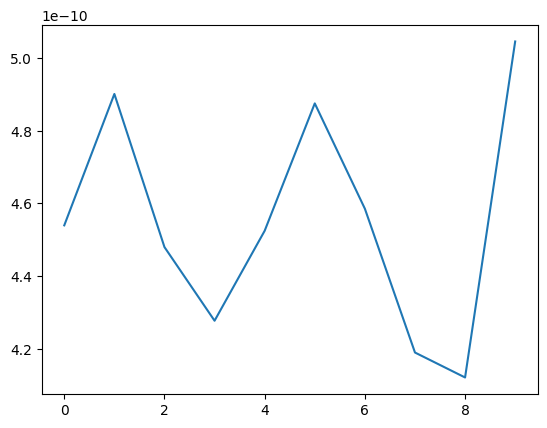

<Figure size 640x480 with 0 Axes>

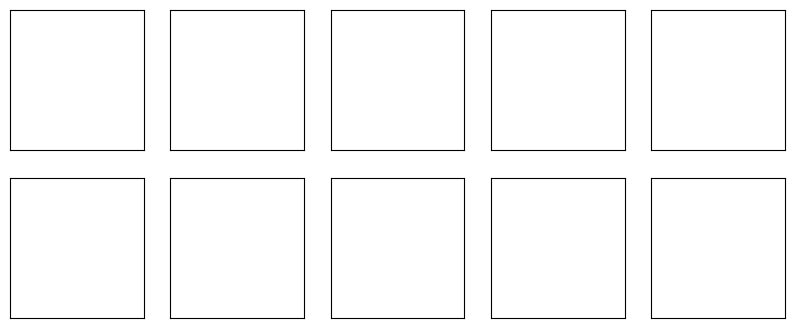

In [ ]:
# dataset만 변경하여 이전 과정과 동일하게 수행

url = 'https://github.com/dknife/ML/raw/main/data/Proj2/test_data/'

test_images = []                                                                # test images를 저장할 배열

for i in range(10):
    file = url + 'img{0:02d}.jpg'.format(i+1)
    img = imread(file)
    img = resize(img, (75,75))
    test_images.append(img)

test_images = np.array(test_images)
test_result = model.predict(test_images)                                        # fitting된 model으로 예측 (테스트 데이터)

plt.plot(test_result)                                                           # 예측 결과를 보여주는 plot 출력
                                                                                # 학습이 제대로 수행되지 않았기에 테스트 데이터에 대해서도 제대로 수행하지 못하는 결과가 나타남

fig = plt.figure()
fig, ax = plt.subplots(2,5, figsize = (10,4))
for i in range(2):
    for j in range(5):
        ax[i, j].get_xaxis().set_visible(False)
        ax[i, j].get_yaxis().set_visible(False)
        if test_result[i*5+j] > 0.5:
            ax[i, j].imshow(test_images[i*5+j],interpolation='nearest')

In [ ]:
# 전이 학습을 통해 수행할 것이기 때문에 사전 훈련된 모델(InceptionV3)을 가져옴
frozen = InceptionV3(input_shape=(75, 75, 3),                                   # 75x75 크기의 컬러 이미지(3채널)을 입력으로 지정
                     include_top=False,                                         # InceptionV3 모델의 최상위에 있는 분류기 레이어를 포함하지 않고 모델을 구성
                                                                                # 즉, 마지막에 위치한 Fully Connected 레이어를 포함하지 않음으로서 모델을 특성 추출기로 사용할 수 있음
                     weights='imagenet')                                        # imagenet의 미리 훈련된 가중치 사용

last_layer = frozen.get_layer('mixed7')                                         # 가져온 사전 훈련 모델에서 mixed7 계층까지 적용된 모델 추출

last_output = last_layer.output

for layer in frozen.layers:
    layer.trainable = False                                                     # 추출된 모델의 가중치 고정

In [ ]:
my_layer = layers.Flatten()(last_output)                                # 추출한 모델의 output을 입력으로 사용하기 위해서 1차원 배열로 팽창
my_layer = layers.Dense(256, activation='relu')(my_layer)               # 256개의 노드를 가지는 은닉층 추가 생성 (활성화 함수는 relu 사용)
my_layer = layers.Dense(256, activation='relu')(my_layer)               # 256개의 노드를 가지는 은닉층 추가 생성 (활성화 함수는 relu 사용)
my_layer = layers.Dense(1, activation='sigmoid')(my_layer)              # face_images와 animal_images를 이진 분류할 것이기에 1개의 노드를 출력으로 지정 (활성화 함수는 sigmoid 사용)

transfer_learner = Model(frozen.input, my_layer)                        # mixed7 계층까지 적용된 추출 모델에 추가로 구성한 my_layer를 합쳐 하나의 모델로 구성

# 학습을 위해 손실 함수는 mean squared error, 최적화 함수는 adam 최적화, 모델 평가 지표는 accuracy 값을 가지도록 하여 컴파일
transfer_learner.compile(optimizer='adam', loss='mse', metrics=['accuracy'])

transfer_learner.summary()              # 형성된 모델의 구조 확인

Model: "model_14"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_15 (InputLayer)          [(None, 75, 75, 3)]  0           []                               
                                                                                                  
 conv2d_1042 (Conv2D)           (None, 37, 37, 32)   864         ['input_15[0][0]']               
                                                                                                  
 batch_normalization_1034 (Batc  (None, 37, 37, 32)  96          ['conv2d_1042[0][0]']            
 hNormalization)                                                                                  
                                                                                                  
 activation_1034 (Activation)   (None, 37, 37, 32)   0           ['batch_normalization_1034

In [ ]:
history = transfer_learner.fit(X, y, epochs=100, shuffle=True)                  # default batch size인 32로 100회 반복하여 학습 (shuffle=True를 통해 입력데이터를 섞어서 사용)

Epoch 1/100
1/1 [==============================] - 4s 4s/step - loss: 0.2865 - accuracy: 0.4667
Epoch 2/100
1/1 [==============================] - 0s 247ms/step - loss: 0.0024 - accuracy: 1.0000
Epoch 3/100
1/1 [==============================] - 0s 256ms/step - loss: 6.9318e-05 - accuracy: 1.0000
Epoch 4/100
1/1 [==============================] - 0s 240ms/step - loss: 4.2604e-06 - accuracy: 1.0000
Epoch 5/100
1/1 [==============================] - 0s 246ms/step - loss: 4.5871e-07 - accuracy: 1.0000
Epoch 6/100
1/1 [==============================] - 0s 250ms/step - loss: 7.2915e-08 - accuracy: 1.0000
Epoch 7/100
1/1 [==============================] - 0s 240ms/step - loss: 1.4815e-08 - accuracy: 1.0000
Epoch 8/100
1/1 [==============================] - 0s 245ms/step - loss: 3.6717e-09 - accuracy: 1.0000
Epoch 9/100
1/1 [==============================] - 0s 241ms/step - loss: 1.0637e-09 - accuracy: 1.0000
Epoch 10/100
1/1 [==============================] - 0s 257ms/step - loss: 3.5381e-10

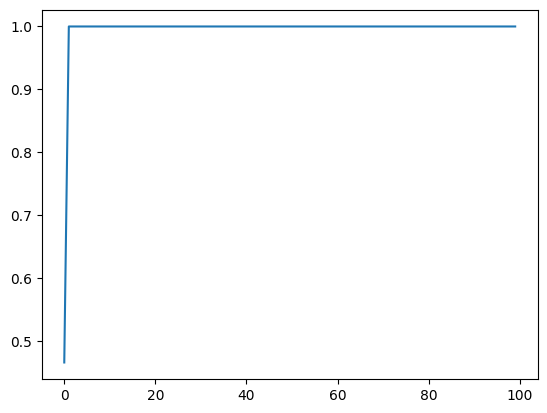

In [ ]:
plt.plot(history.history['accuracy'])                   # 정확도 값의 변화를 보여주는 plot 출력

1/1 [==============================] - 1s 1s/step


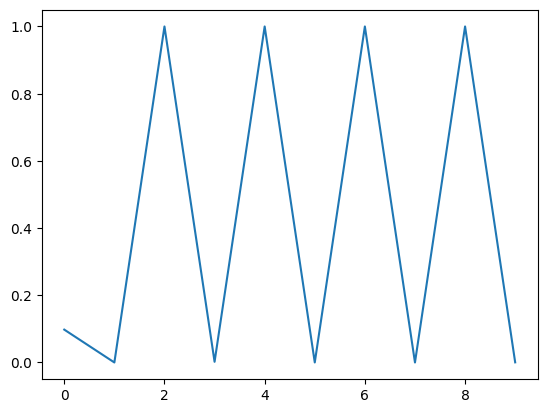

In [ ]:
test_result = transfer_learner.predict(test_images)                 # fitting된 model으로 예측 (테스트 데이터)

plt.plot(test_result)                                               # 예측 결과를 보여주는 plot 출력

<Figure size 640x480 with 0 Axes>

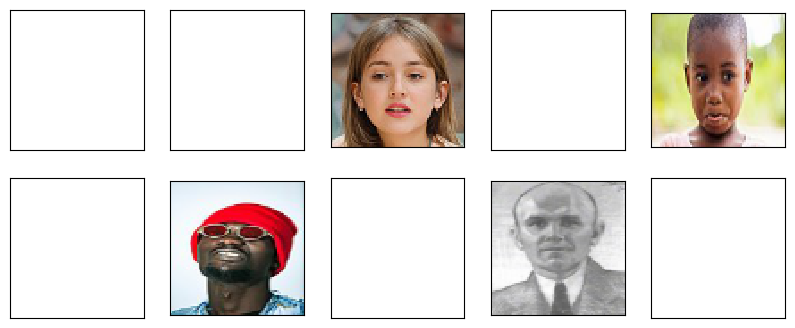

In [ ]:
fig = plt.figure()
fig, ax = plt.subplots(2,5, figsize = (10,4))
for i in range(2):
    for j in range(5):
        ax[i, j].get_xaxis().set_visible(False)
        ax[i, j].get_yaxis().set_visible(False)
        if test_result[i*5+j] > 0.5:
            ax[i, j].imshow(test_images[i*5+j],interpolation='nearest')

In [ ]:
from keras.applications.vgg16 import VGG16

# 사전 훈련된 모델 (VGG16)을 가져옴
vgg16 = VGG16(weights='imagenet',               # imagenet의 미리 훈련된 가중치 사용
              include_top=False,                # InceptionV3 모델의 최상위에 있는 분류기 레이어를 포함하지 않고 모델을 구성
                                                # 즉, 마지막에 위치한 Fully Connected 레이어를 포함하지 않음으로서 모델을 특성 추출기로 사용할 수 있음
              input_shape=(75, 75, 3))          # 75x75 크기의 컬러 이미지(3채널)을 입력으로 지정

In [ ]:
vgg16.summary()                 # 형성된 모델의 구조 확인

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_16 (InputLayer)       [(None, 75, 75, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 75, 75, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 75, 75, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 37, 37, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 37, 37, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 37, 37, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 18, 18, 128)       0     

In [ ]:
last_layer = vgg16.get_layer('block4_pool')                             # 가져온 사전 훈련 모델에서 block4_pool 계층까지 적용된 모델 추출

last_output = last_layer.output

for layer in vgg16.layers:
   layer.trainable = False                                              # 추출된 모델의 가중치 고정

my_layer = layers.Flatten()(last_output)                                # 추출한 모델의 output을 입력으로 사용하기 위해서 1차원 배열로 팽창
my_layer = layers.Dense(32, activation='relu')(my_layer)                # 32개의 노드를 가지는 은닉층 추가 생성 (활성화 함수는 relu 사용)
my_layer = layers.Dense(32, activation='relu')(my_layer)                # 32개의 노드를 가지는 은닉층 추가 생성 (활성화 함수는 relu 사용)
my_layer = layers.Dense(1, activation='sigmoid')(my_layer)              # face_images와 animal_images를 이진 분류할 것이기에 1개의 노드를 출력으로 지정 (활성화 함수는 sigmoid 사용)

transfer_learner = Model(vgg16.input, my_layer)                         # block4_pool 계층까지 적용된 추출 모델에 추가로 구성한 my_layer를 합쳐 하나의 모델로 구성

# 학습을 위해 손실 함수는 mean squared error, 최적화 함수는 adam 최적화, 모델 평가 지표는 accuracy 값을 가지도록 하여 컴파일
transfer_learner.compile(optimizer='adam', loss='mse', metrics=['accuracy'])

In [ ]:
transfer_learner.summary()              # 형성된 모델의 구조 확인

Model: "model_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_16 (InputLayer)       [(None, 75, 75, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 75, 75, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 75, 75, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 37, 37, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 37, 37, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 37, 37, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 18, 18, 128)       0  

Epoch 1/100
1/1 [==============================] - 4s 4s/step - loss: 0.3956 - accuracy: 0.4000
Epoch 2/100
1/1 [==============================] - 2s 2s/step - loss: 0.0668 - accuracy: 0.8667
Epoch 3/100
1/1 [==============================] - 2s 2s/step - loss: 0.0708 - accuracy: 0.9000
Epoch 4/100
1/1 [==============================] - 2s 2s/step - loss: 8.7612e-05 - accuracy: 1.0000
Epoch 5/100
1/1 [==============================] - 2s 2s/step - loss: 5.4618e-04 - accuracy: 1.0000
Epoch 6/100
1/1 [==============================] - 2s 2s/step - loss: 0.0036 - accuracy: 1.0000
Epoch 7/100
1/1 [==============================] - 2s 2s/step - loss: 6.5284e-04 - accuracy: 1.0000
Epoch 8/100
1/1 [==============================] - 2s 2s/step - loss: 5.6760e-04 - accuracy: 1.0000
Epoch 9/100
1/1 [==============================] - 2s 2s/step - loss: 3.2522e-04 - accuracy: 1.0000
Epoch 10/100
1/1 [==============================] - 2s 2s/step - loss: 1.5254e-04 - accuracy: 1.0000
Epoch 11/100
1/

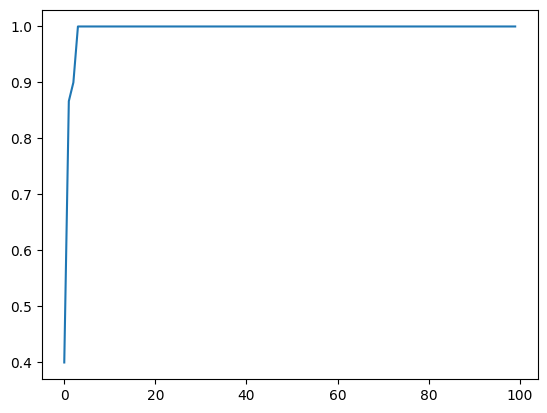

In [ ]:
history = transfer_learner.fit(X, y, epochs=100, shuffle=True)          # default batch size인 32로 100회 반복하여 학습 (shuffle=True를 통해 입력데이터를 섞어서 사용)

plt.plot(history.history['accuracy'])                                   # 정확도 값의 변화를 보여주는 plot 출력

1/1 [==============================] - 1s 610ms/step


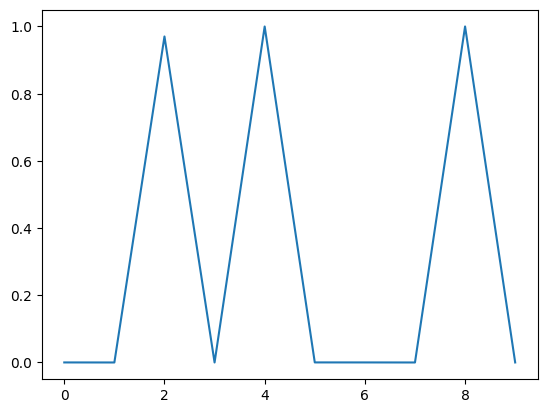

In [ ]:
test_result = transfer_learner.predict(test_images)                 # fitting된 model으로 예측 (테스트 데이터)

plt.plot(test_result)                                               # 예측 결과를 보여주는 plot 출력

<Figure size 640x480 with 0 Axes>

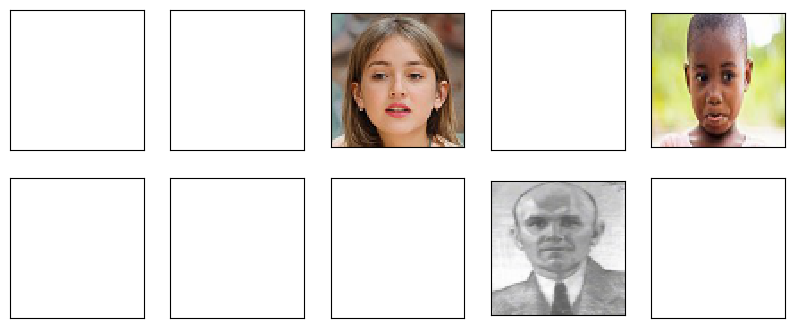

In [ ]:
fig = plt.figure()
fig, ax = plt.subplots(2,5, figsize = (10,4))
for i in range(2):
    for j in range(5):
        ax[i, j].get_xaxis().set_visible(False)
        ax[i, j].get_yaxis().set_visible(False)
        if test_result[i*5+j] > 0.5:
            ax[i, j].imshow(test_images[i*5+j],interpolation='nearest')

##(4) 결과 비교


###SVM (Support Vector Machine)

SVM은 지도 학습 알고리즘이다.
SVM은 데이터를 고차원 공간으로 매핑하여 클래스를 분리하는 최적의 초평면(hyperplane)을 찾는 것을 목표로 한다.

장점: 효과적인 고차원 분류, 마진을 최대화하면 일반화 성능 향상, 커널 트릭을 통한 비선형 분류 가능
단점: 대규모 데이터셋 및 다중 클래스 문제에는 비효율적, 매개변수 튜닝이 필요, 계산 비용이 크고 메모리 사용량이 높을 수 있음


###CNN (Convolutional Neural Network)

CNN은 딥러닝 알고리즘이다.
CNN은 그리드 형태의 데이터에서 공간적인 구조를 파악하고 특징을 추출하기 위해 컨볼루션(convolution) 연산을 사용하며
컨볼루션 레이어, 풀링(pooling) 레이어, 완전 연결 레이어 등으로 구성된다.

장점: 이미지 등 공간적인 구조를 잘 파악하여 특징 추출에 효과적, 데이터의 공간적 계층 구조 학습,
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; 자동으로 특징을 추출하여 end-to-end 학습 가능, 수행하려는 작업에 따라 다른 특징을 사용할 수도 있음
단점: 대규모 데이터셋 및 복잡한 모델 구조에는 많은 계산 리소스가 필요, 과적합(overfitting) 가능성이 높음, 훈련 시간이 오래 걸릴 수 있음


###전이 학습 (Transfer Learning)

전이 학습은 사전 훈련된 모델을 가져와서 추가 작업에 맞게 수정하거나 새로운 분류기를 추가하는 방식으로 사용되는 학습 방법이다.

장점: 작은 데이터셋에서도 효과적인 학습 가능, 훈련 시간과 리소스 사용량을 줄일 수 있음, 사전 훈련된 모델의 일반화 능력 활용 가능
단점: 사전 훈련된 모델이 원래 작업과 다를 경우 성능 저하 가능, 적합한 사전 훈련 데이터셋이 필요, 특정 작업에 과적합되어 있을 수 있음

###결과 비교

SVM : 5개의 정답 중에서 3개를 검출해냈음  (테스트 환경에서 사용되는 데이터셋에 대한 모델의 매개변수가 최적화되어 있지 않아
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;  가장 좋지 않은 결과를 보였지만 파라미터 튜닝을 통해 결과를 개선시킬 여지가 있음)

CNN : 5개의 정답 중에서 5개를 검출해냈음  (이미지와 같은 공간적인 구조를 잘 파악하기에 타 알고리즘에 비해 좋은 결과를 보임)

전이 학습 : 5개의 정답 중에서 4개를 검출해냈음 (기존의 사전 훈련된 모델이 훌륭함에도 불구하고 사전 훈련 데이터셋이
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;  테스트 환경에서 사용되는 데이터셋과는 차이가 있기에 CNN보다는 아쉬운 결과를 보임)